# Estación Casa de Campo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_24.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,24.903226
2013-02-01,18.741935
2013-03-01,13.483871
2013-04-01,12.161290
2013-05-01,11.516129


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

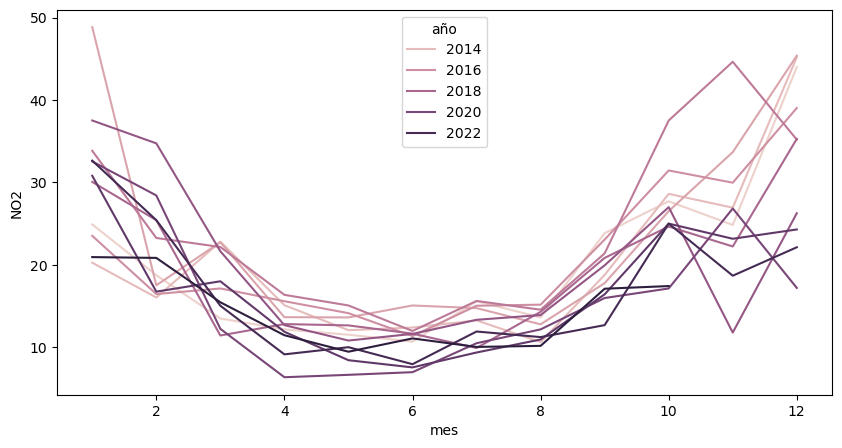

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

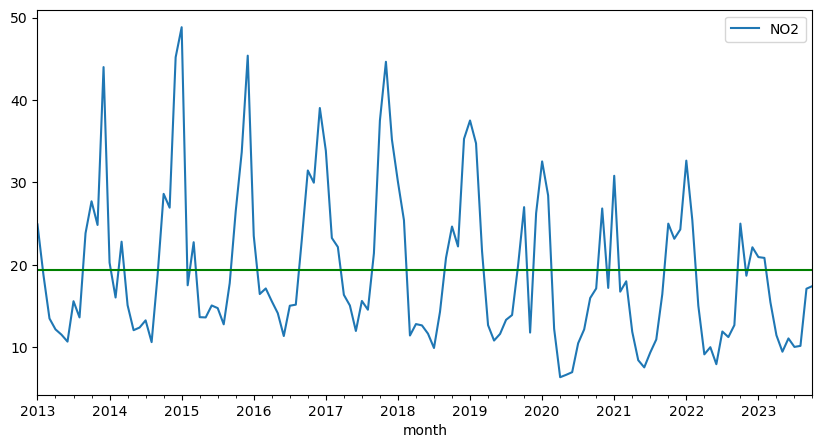

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

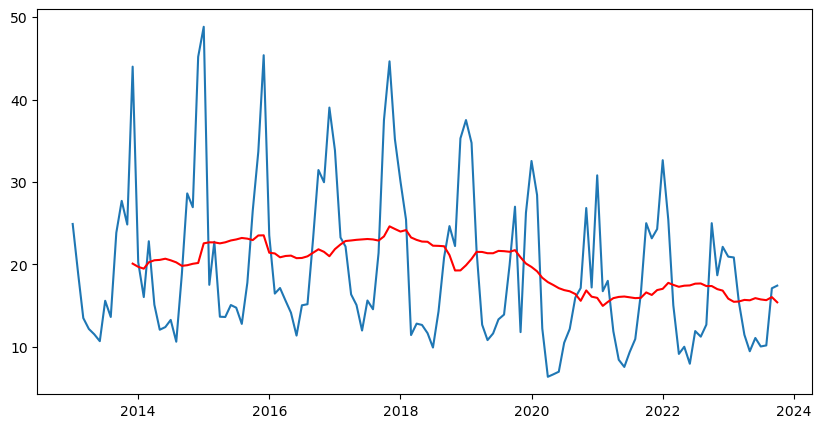

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.6520898365877041,
 0.8587722612670956,
 12,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 734.9740180719436)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6520898365877041
p-value 0.8587722612670956
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999998
1 mes Lag, 0.6562684703622264
2 mes Lag, 0.3569350386833639
3 mes Lag, 0.06505675929953662
4 mes Lag, -0.25985136187745583
5 mes Lag, -0.45304917648698706
6 mes Lag, -0.5213742598802209
7 mes Lag, -0.4724055081020781
8 mes Lag, -0.3015837419842498
9 mes Lag, 0.016160940241166738
10 mes Lag, 0.3214181019145069
11 mes Lag, 0.5885786025416676
12 mes Lag, 0.7590901731363469
13 mes Lag, 0.6548219885503923
14 mes Lag, 0.3580902170444318
15 mes Lag, 0.08978308652132812
16 mes Lag, -0.2421452003164263
17 mes Lag, -0.4760165657117097
18 mes Lag, -0.5546145957007683
19 mes Lag, -0.5100103904971628
20 mes Lag, -0.31135522768762575
21 mes Lag, -0.010712830212832302
22 mes Lag, 0.25913134206163624
23 mes Lag, 0.5800505800268213
24 mes Lag, 0.7452855832770309
25 mes Lag, 0.6250264726238496
26 mes Lag, 0.37769911692553737
27 mes Lag, 0.07436236843114324
28 mes Lag, -0.2664768579590743
29 mes Lag, -0.4918333212028505
30 mes Lag, -0.6015657048109709
31 mes Lag, -0.52842441

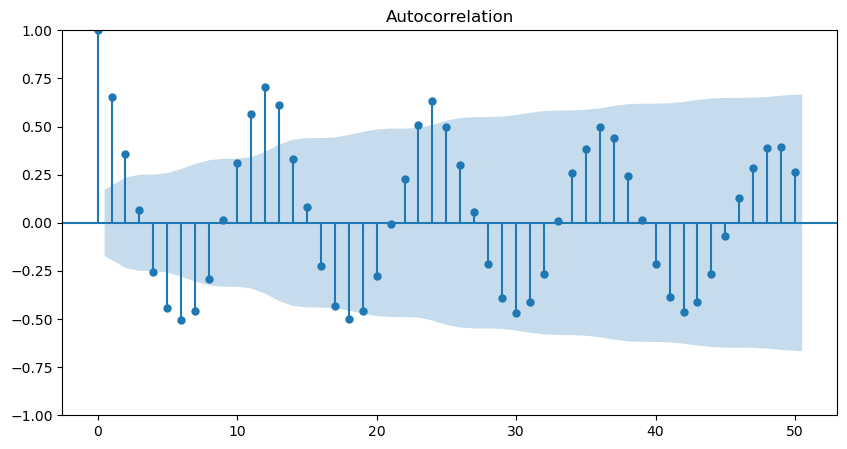

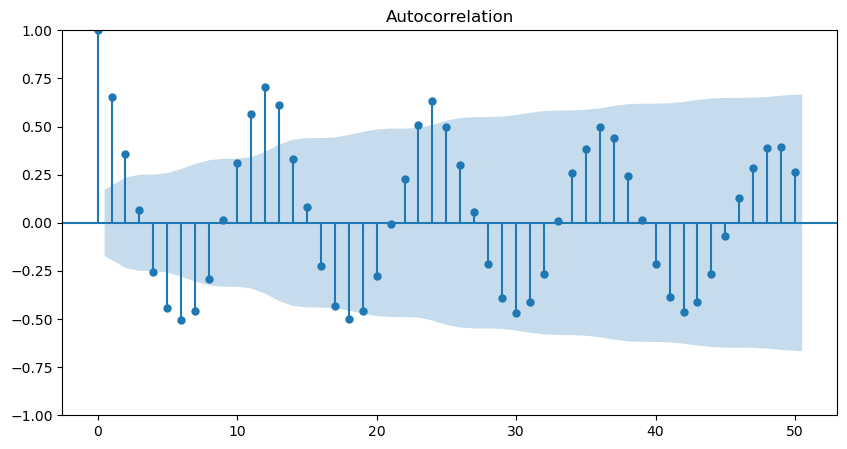

In [14]:
plot_acf(df, lags = 50)

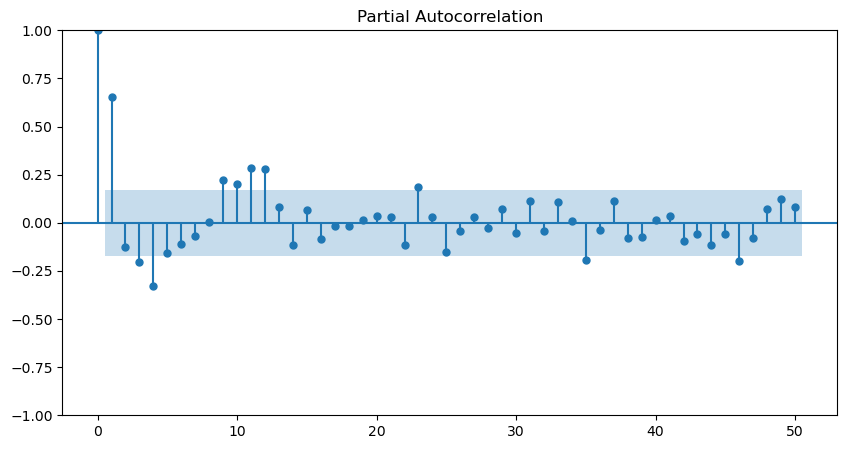

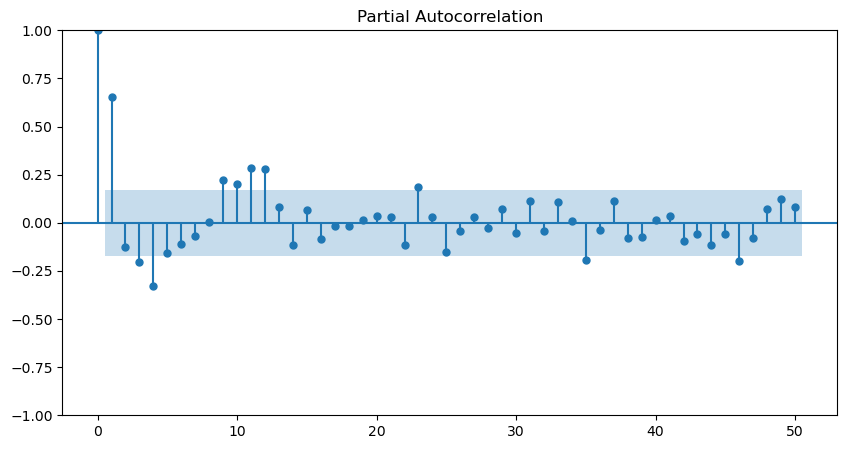

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,24.903226
2013-02-01,18.741935
2013-03-01,13.483871
2013-04-01,12.161290
2013-05-01,11.516129


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  2.4456995923134865
CPU times: total: 3.56 s
Wall time: 7.87 s


,real,pred,error
2021-05-01,8.419355,10.251118,1.831763
2021-06-01,7.548387,10.049813,2.501426
2021-07-01,9.354839,11.869260,2.514422
2021-08-01,10.935484,13.289838,2.354354
2021-09-01,16.419355,18.386378,1.967023
2021-10-01,25.000000,23.460906,-1.539094
2021-11-01,23.161290,22.156090,-1.005201
2021-12-01,24.290323,25.668941,1.378618
2022-01-01,32.645161,35.280912,2.635750
2022-02-01,25.419355,24.047615,-1.371740


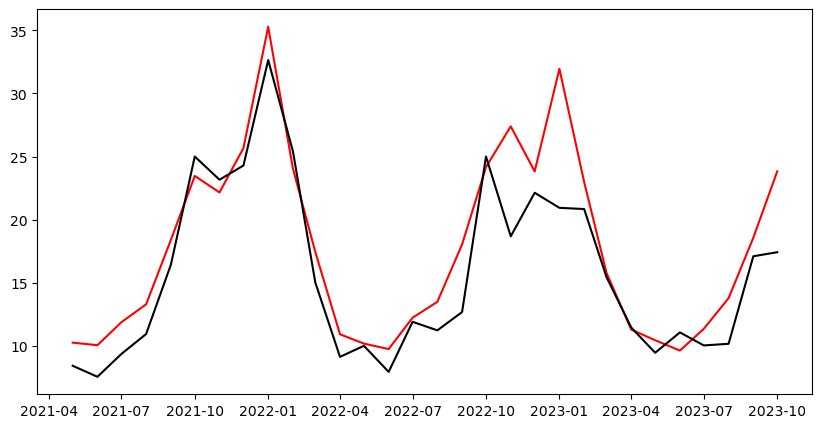

In [22]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [23]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,25.331820
2023-12-01,23.839923
2024-01-01,34.887918
2024-02-01,26.339606
2024-03-01,17.077881
2024-04-01,11.293715
2024-05-01,10.383394
2024-06-01,9.805572
2024-07-01,11.908969
2024-08-01,13.972684


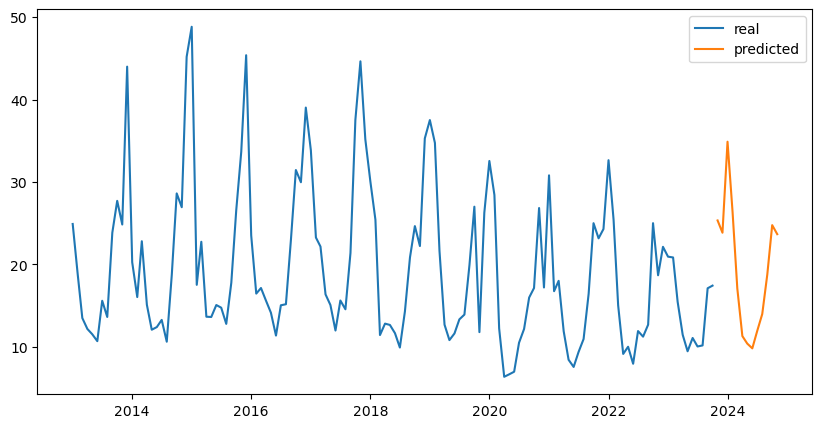

In [24]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [25]:
pred_año.mean()

predicted_mean    19.3882
dtype: float64